# Fall Problem Session 4

## Building a Final Vehicle Sales Model

This problem session will be our last time working with a non-time series regression task.

These problems will touch on material from all of the lecture notebooks in the `Regression` folder.

Your overall goal for the notebook is to build the best regression model you can to predict the final selling price of a vehicle using the data in the `car_sales.csv` data.

In [1]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### 1. Load and process the data

##### a.

First load the `car_sales.csv` data. Then drop the missing values.

##### Sample Solution

In [2]:
cars = pd.read_csv("../Data/car_sales.csv")
cars.dropna(inplace = True)

##### b.

Run the following code to clean and prepare the data.

<i>Note: there is nothing new here, all of this code was covered in `Fall Problem Session 2` and `Fall Problem Session 3`</i>.

In [3]:
def clean_column(text):
    return float(text.split()[0])

In [4]:
## Cleaning the mileage, engine and max_power columns
cars['mileage'] = cars['mileage'].apply(clean_column)
cars['engine'] = cars['engine'].apply(clean_column)
cars['max_power'] = cars['max_power'].apply(clean_column)

## creating the age column
cars['age'] = 2020 - cars['year']

## performing the log transform on selling_price and km_driven
cars['log_sell'] = np.log10(cars['selling_price'])
cars['log_km'] = np.log10(cars['km_driven'])

## making one-hot encoded variables for transmission, dealer and owner
cars['automatic'] = 1
cars.loc[cars.transmission=='Manual', 'automatic'] = 0

cars[['first_owner', 'second_owner', 'third_owner']] = pd.get_dummies(cars['owner'])[['First Owner', 
                                                                                      'Second Owner',
                                                                                      'Third Owner']]

cars['dealer'] = 1
cars.loc[cars.seller_type == 'Individual', 'dealer'] = 0

##### c. 

Here is a refresher on the columns of this data set.

<u>Outcome Variable</u>
- `selling_price` or `log_sell` (you will use `log_sell` in your models)

<u>Continuous Features</u>
- `km_driven` and thus `log_km`
- `mileage`
- `engine`
- `max_power`
- `seats`
- `age`

<u>Categorical Features</u>
- `fuel`
- `seller_type`
- `transmission`
- `owner`

<u>One-hot Encoded Variables</u>
- `automatic`: `1` if `transmission == "Automatic"`, `0` otherwise
- `dealer`: `1` if `seller_type != "Individual"`, `0` otherwise
- `first_owner`: `1` if `owner == "First Owner"`, `0` otherwise
- `second_owner`: `1` if `owner == "Second Owner"`, `0` otherwise
- `third_owner`: `1` if `owner == "Third Owner"`, `0` otherwise


You will ignore `torque` because it would require more cleaning than we will spend time on in these problem sessions.

#### d. 

Make a train test split, set $20\%$ aside for the test set.

##### Sample Solution

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
cars_train, cars_test = train_test_split(cars.copy(),
                                            test_size=.2,
                                            shuffle=True,
                                            random_state=440)

#### 2. Even more EDA

In the past two notebooks you have looked at potential relationships between `log_sell` and:
- `mileage`
- `log_km`
- `age`
- `fuel`
- `seller_type` or `dealer`
- `transmission` or `automatic` and
- `onwer` or `first_owner`, `second_owner` and `third_owner`.

This leaves three unexplored variables:
- `engine`
- `max_power`
- `seats`

##### a.

Make some plots and calculate relevant statistics to examine if these three variables are worth including in potential models.

##### Sample Solution

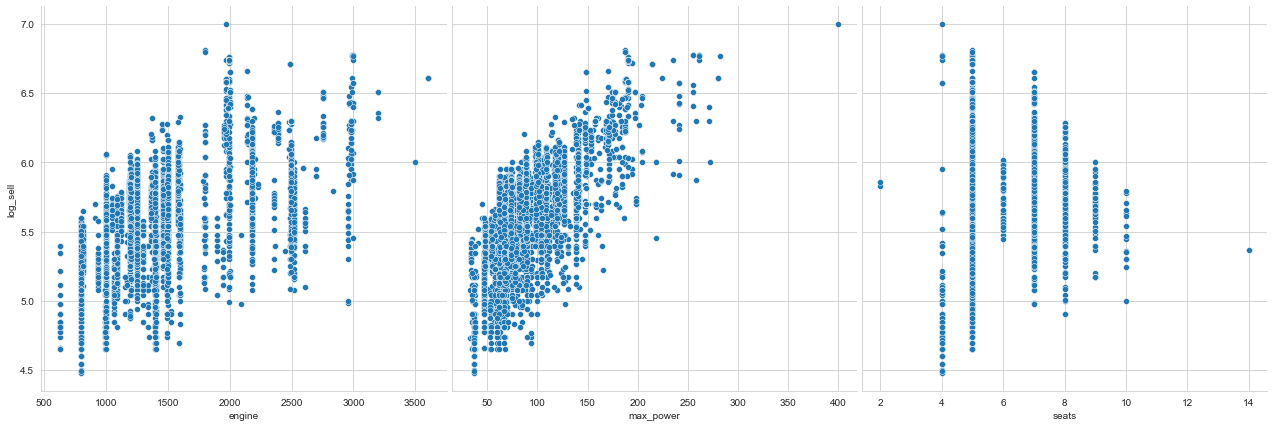

In [7]:
sns.pairplot(data = cars_train,
                x_vars = ['engine', 'max_power', 'seats'],
                y_vars = ['log_sell'],
                height = 6)

plt.show()

In [8]:
cars_train[['log_sell', 
            'engine', 
            'max_power', 
            'seats',
            'age',
            'log_km']].corr().sort_values('log_sell', ascending=False)['log_sell']

log_sell     1.000000
max_power    0.732945
engine       0.520356
seats        0.190833
log_km      -0.362105
age         -0.699555
Name: log_sell, dtype: float64

##### b.

Make a list of continuous variables you plan on considering for your model.

##### Sample Solution

- `max_power`
- `age`
- `engine`
- `log_km`
- `seats`

##### c.

Refer back to `Fall Problem Session 3`, make a list of categorical variables you plan on considering for your model.

##### Sample Solution

- `transmission`
- `dealer`
- `owner`

##### d.

A nice feature of many of `seaborn`'s plotting functions is the ability to change the `color` or `hue` of the plotted objects based on the values of a categorical variable.

Doing this with `lmplot`, <a href="https://seaborn.pydata.org/generated/seaborn.lmplot.html">https://seaborn.pydata.org/generated/seaborn.lmplot.html</a>, could be helpful when deciding if you want to add an interaction term.

Below is an example of how to implement the `hue` argument to investigate if we might want an interaction term between `age` and `transmission` in our model.

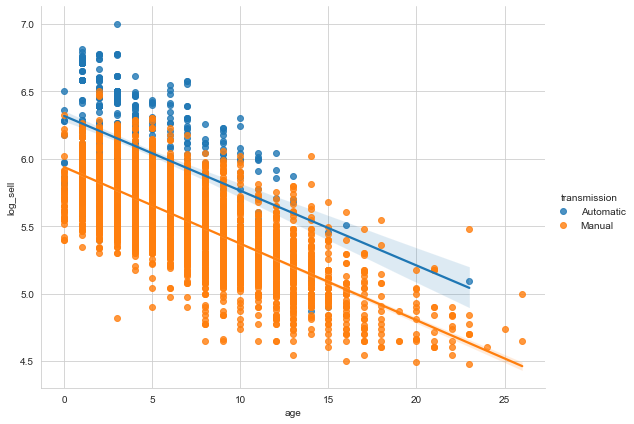

In [9]:
sns.lmplot(data=cars_train,
              x='age',
              y='log_sell',
              hue='transmission',
              height=6,
              aspect=1.3)

plt.show()

These two lines look roughly parallel indicating that there may not be an interaction between `age` and `transmission`.

Spend some time investigating such plots to decide whether any interaction terms are worth adding.

##### Sample Solution

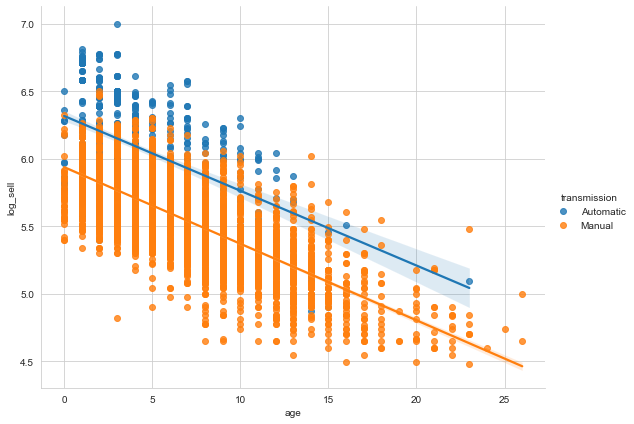

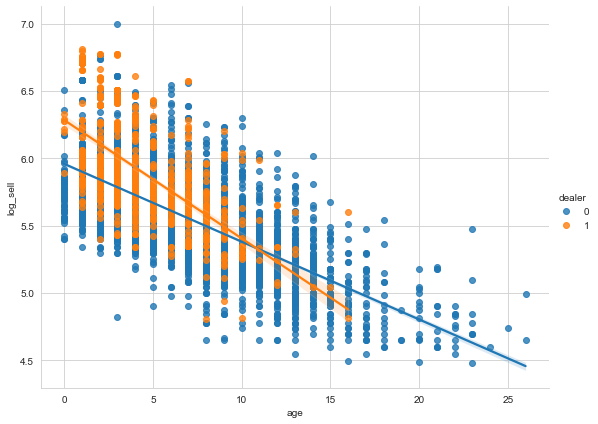

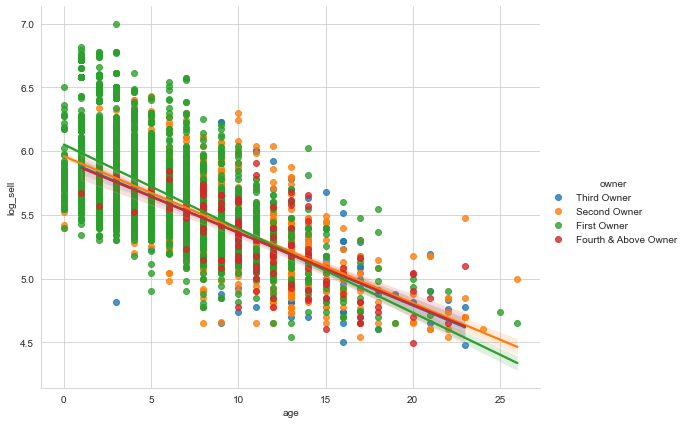

In [10]:
### Age as x

## transmission as hue
sns.lmplot(data=cars_train,
              x='age',
              y='log_sell',
              hue='transmission',
              height=6,
              aspect=1.3)

plt.show()

## dealer as hue
sns.lmplot(data=cars_train,
              x='age',
              y='log_sell',
              hue='dealer',
              height=6,
              aspect=1.3)

plt.show()

## owner as hue
sns.lmplot(data=cars_train,
              x='age',
              y='log_sell',
              hue='owner',
              height=6,
              aspect=1.3)

plt.show()

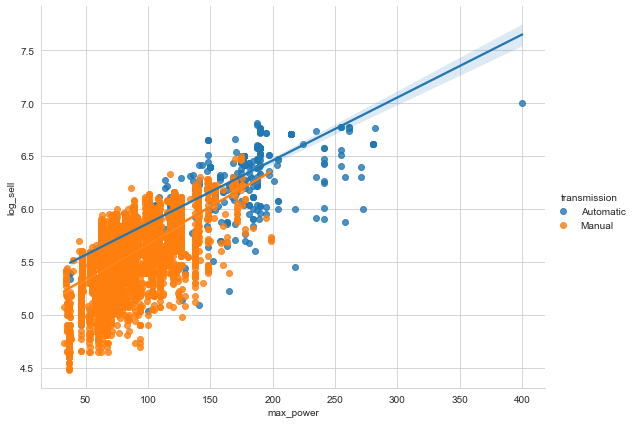

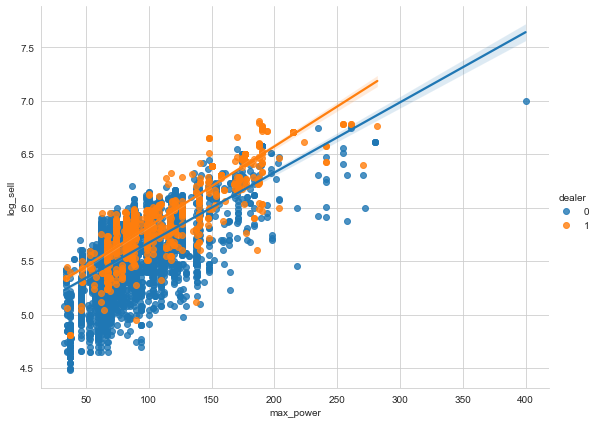

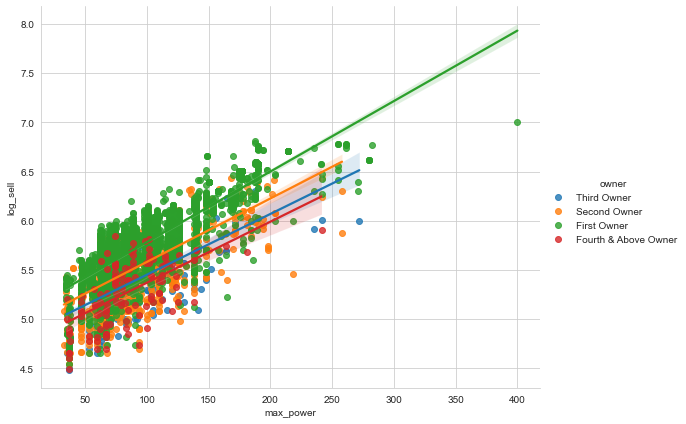

In [11]:
### max_power as x

## transmission as hue
sns.lmplot(data=cars_train,
              x='max_power',
              y='log_sell',
              hue='transmission',
              height=6,
              aspect=1.3)

plt.show()

## dealer as hue
sns.lmplot(data=cars_train,
              x='max_power',
              y='log_sell',
              hue='dealer',
              height=6,
              aspect=1.3)

plt.show()

## owner as hue
sns.lmplot(data=cars_train,
              x='max_power',
              y='log_sell',
              hue='owner',
              height=6,
              aspect=1.3)

plt.show()

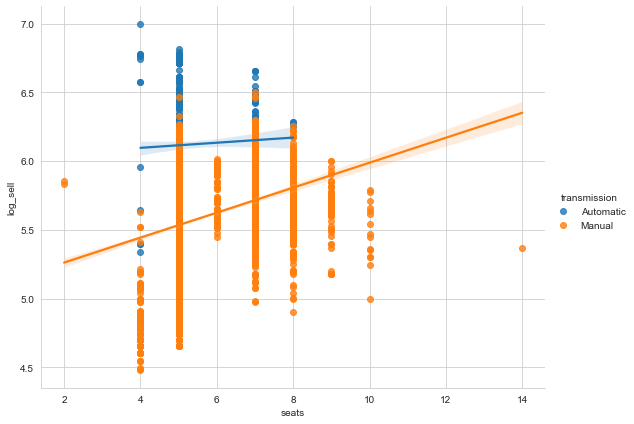

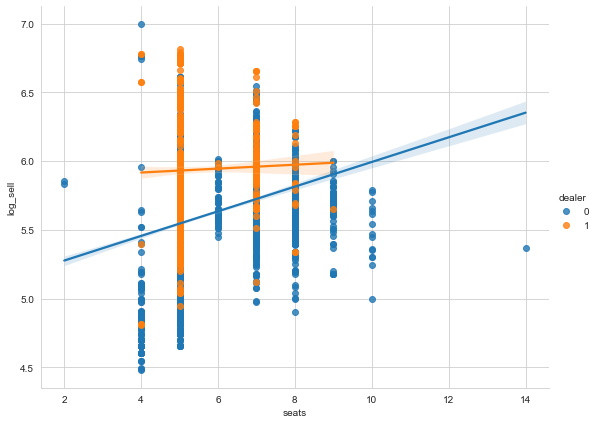

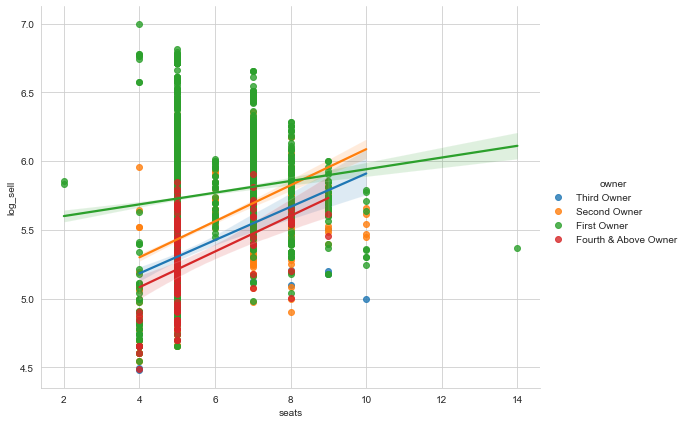

In [12]:
### seats as x

## transmission as hue
sns.lmplot(data=cars_train,
              x='seats',
              y='log_sell',
              hue='transmission',
              height=6,
              aspect=1.3)

plt.show()

## dealer as hue
sns.lmplot(data=cars_train,
              x='seats',
              y='log_sell',
              hue='dealer',
              height=6,
              aspect=1.3)

plt.show()

## owner as hue
sns.lmplot(data=cars_train,
              x='seats',
              y='log_sell',
              hue='owner',
              height=6,
              aspect=1.3)

plt.show()

##### e.

Make a list of variables that you think <i>might</i> be good for a model predicting `log_sell` including any interactions we may not have made as columns yet. We will use this in the next portion of the notebook.

##### Sample Solution

- `max_power`
- `age`
- `engine`
- `log_km`
- `seats`
- `dealer`
- `automatic`
- I decided to go with no interactions because instances with non-parallel lines above seem to be driven more by a lack of observations for one category

#### 3. Model comparisons

In this question we will work through a few different model selection procedures.

##### a. 

First you will try to implement <i>best subsets selection</i>. Remember that this is when you build all possible models from a given set of features and see which one has the lowest possible cross-validation MSE. Use the function `powerset` below to get a list of all possible models you will consider. 

<i>Note: You will need to make some alterations to the list returned by `powerset` if you chose to consider a categorical feature with more than two categories. For example, you couldn't have a model with just `first_owner` and `second_owner` but not `third_owner` you always have to have all three when building a model to include `owner`.</i>

In [13]:
# This function was modified from stackexchange user hughdbrown 
# at this link, 
# https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset

# This returns the power set of a set minus the empty set
def powerset(s):
    power_set = []
    x = len(s)
    for i in range(1 << x):
        power_set.append([s[j] for j in range(x) if (i & (1 << j))])
        
    return power_set[1:]

##### Sample Solution

In [14]:
potential_features = ['max_power',
                         'age',
                         'engine',
                         'log_km',
                         'seats',
                         'dealer',
                         'automatic',
                         'mileage',
                         'owner']

all_models = ['baseline']
all_models.extend(powerset(potential_features))

for i in range(len(all_models)):
    if 'owner' in all_models[i]:
        all_models[i].remove('owner')
        all_models[i].extend(['first_owner', 'second_owner', 'third_owner'])

##### b.

Fill in the code below to perform 5-fold cross-validation in order to compare all of the models you made above. Here you will make comparisons of the root mean squared error of the predictions of $10^{\log\left(\text{Selling Price}\right)}$.

##### Sample Solution

In [15]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
mses = np.zeros((len(all_models), 5))

kfold = KFold(5,
             random_state = 614,
             shuffle=True)

j = 0
for train_index, test_index in kfold.split(cars_train):
    cars_tt = cars_train.iloc[train_index]
    cars_ho = cars_train.iloc[test_index]
    
    i = 0
    for model in all_models:
        if model == "baseline":
            pred = np.power(10,cars_tt.log_sell.mean()*np.ones(len(cars_ho)))
            
            mses[i, j] = mean_squared_error(cars_ho.selling_price, pred)
        else:
            if len(model) == 1:
                reg = LinearRegression(copy_X = True)
                
                reg.fit(cars_tt[model].values.reshape(-1,1),
                           cars_tt.log_sell)
                
                pred = np.power(10,reg.predict(cars_ho[model]))
                
                mses[i,j] = mean_squared_error(cars_ho.selling_price, pred)
            else:
                reg = LinearRegression(copy_X = True)
                
                reg.fit(cars_tt[model].values,
                           cars_tt.log_sell)
                
                pred = np.power(10,reg.predict(cars_ho[model]))
                
                mses[i,j] = mean_squared_error(cars_ho.selling_price, pred)
        i = i + 1
    j = j + 1

/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.w

In [17]:
np.min(np.mean(np.sqrt(mses), axis=1))

351093.2402668918

In [18]:
all_models[np.argmin(np.mean(np.sqrt(mses), axis=1))]

['max_power', 'age', 'engine', 'log_km', 'seats', 'dealer', 'automatic']

##### c.

Now attempt to use lasso regression for feature selection on the features:
- `mileage`
- `max_power`
- `age`
- `engine`
- `log_km`
- `seats`
- `dealer`
- `automatic`
- `first_owner`
- `second_owner`
- `third_owner`.

How do the results compare with what you found in <i>b.</i>?

<i>Hint: remember to scale your continuous features with `StandardScaler` first.</i>

##### Sample Solution

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [20]:
scaled_data = np.zeros((len(cars_train), 11))

scaler = StandardScaler()
scaled_data[:,:6] = scaler.fit_transform(cars_train[['mileage', 'max_power',
                                                          'age', 'engine', 
                                                          'log_km', 'seats']])

scaled_data[:,6] = cars_train.dealer.values
scaled_data[:,7] = cars_train.automatic.values
scaled_data[:,8] = cars_train.first_owner.values
scaled_data[:,9] = cars_train.second_owner.values
scaled_data[:,10] = cars_train.third_owner.values

In [21]:
alphas = [0.00001,0.0001,0.001,0.005,0.0075,0.01,0.015,0.05,0.1,1]

coefs = np.zeros((len(alphas), 11))

for i,alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha, max_iter = 100000)
    lasso.fit(scaled_data, cars_train.log_sell.values)
    
    coefs[i, :] = lasso.coef_
    
pd.DataFrame(coefs, 
                index=["alpha = " + str(alpha) for alpha in alphas],
                columns=['mileage', 'max_power',
                          'age', 'engine', 
                          'log_km', 'seats',
                          'dealer', 'automatic',
                          'first_owner', 'second_owner',
                          'third_owner'])

,mileage,max_power,age,engine,log_km,seats,dealer,automatic,first_owner,second_owner,third_owner
alpha = 1e-05,0.041477,0.159735,-0.173153,0.078793,-0.015459,0.016406,0.045135,0.073217,0.053049,0.025459,0.007582
alpha = 0.0001,0.041159,0.159792,-0.173587,0.078745,-0.015389,0.016142,0.044754,0.072203,0.044724,0.017024,-0.000000
alpha = 0.001,0.038093,0.160656,-0.176582,0.078007,-0.014933,0.013710,0.040781,0.062348,0.027664,0.000000,-0.000553
alpha = 0.005,0.024142,0.165355,-0.185892,0.073672,-0.013160,0.003005,0.022006,0.019435,0.012941,-0.000000,-0.000000
alpha = 0.0075,0.016471,0.168730,-0.190805,0.068335,-0.011973,0.000000,0.009802,0.000000,0.003632,-0.000000,-0.000000
alpha = 0.01,0.009846,0.169527,-0.193771,0.061363,-0.009042,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
alpha = 0.015,0.000000,0.169179,-0.196086,0.049690,-0.002077,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
alpha = 0.05,0.000000,0.162562,-0.164299,0.019621,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
alpha = 0.1,-0.000000,0.136092,-0.120636,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
alpha = 1,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000


The results of the lasso feature selection process largely agree with the model I found using best subsets selection. The key difference with lasso is that it suggests the model only including `age`, `max_power` and `engine`. We can examine the rmse results to see how this model compares with the "best" one, it is likely close.

In [22]:
lasso_model = ['age', 'max_power', 'engine']

check_number = [i for i in range(len(all_models)) if set(all_models[i]) == set(lasso_model)][0]

In [23]:
## best model
np.min(np.mean(np.sqrt(mses), axis=1))

351093.2402668918

In [24]:
## lasso model
np.mean(np.sqrt(mses), axis=1)[check_number]

409778.53492144577

##### d.

While we have only covered linear regression model types up to this point there are other regression models. One <i>nonparametric</i> approach is to use <i>$k$-nearest neighbors regression</i>.

This model works by taking the average value of $y$ for $X$'s $k$ nearest neighbors in the training set, where nearest here means the observations in the training set that are closest to $X$ in terms of some distance measure (like Euclidean distance) and $k$ is chosen prior to fitting the model. This model can be fit using `sklearn`'s `KNeighborsRegressor`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html</a>.

Using only continuous features from your best linear regression model fit a $k$-nearest neighbors regression model with $k=5, 10, 15, 20, 25$ and see which one performs best. Then compare this performance to your best linear regression model.

##### Sample Solution

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
ks = [5, 10, 15, 20, 25]

knn_mses = np.zeros((len(ks), 5))

j = 0
for train_index, test_index in kfold.split(cars_train):
    cars_tt = cars_train.iloc[train_index]
    cars_ho = cars_train.iloc[test_index]
    
    for i,k in enumerate(ks):
        knn = KNeighborsRegressor(k)
        
        knn.fit(cars_tt[['max_power', 'age', 'engine', 'log_km', 'seats']],
                   cars_tt.log_sell)
        
        pred = np.power(10, knn.predict(cars_ho[['max_power', 'age', 'engine', 'log_km', 'seats']]))
        
        knn_mses[i,j] = mean_squared_error(cars_ho.selling_price, pred)
    j = j + 1

In [27]:
ks[np.argmin(np.mean(np.sqrt(knn_mses), axis=1))]

5

In [28]:
np.mean(np.sqrt(knn_mses), axis=1)[0]

233795.41309570885

In [29]:
np.min(np.mean(np.sqrt(mses), axis=1))

351093.2402668918

For me the $k$ nearest neighbors model with $k=5$ was an improvement.

##### e.

Prior to choosing your final model, reflect on whether any othe features could have been considered when making this model. You may want to examine a few of the vehicle names while answering this question.

##### Sample Solution

In [30]:
cars_train.name.sample(10)

291                   Hyundai Grand i10 Sportz
7016           Maruti Zen Estilo 1.1 LXI BSIII
6124                    Maruti Swift Dzire VDI
80      Toyota Innova 2.5 VX (Diesel) 8 Seater
135          Land Rover Discovery Sport TD4 SE
1241                    Hyundai i20 Active 1.4
2016                          Mahindra Xylo E8
3925                           Maruti Alto LXi
4955                    Mahindra XUV500 W8 4WD
2860     Mahindra Renault Logan 1.5 DLE Diesel
Name: name, dtype: object

There may be some value in trying to extract data from the name. For example, each name seems to contain the make of the vehicle (Ford, Honda, Volkswagen, etc.) and some suggest features like whether the vehicle had air conditioning. This would take a lot more cleaning, but could provide useful information.

#### 4 Examining the test performance

##### a. 

From all of your investigations choose a final model.

##### Sample Solution

The $k$ nearest neighbors model I test with $k=5$.

##### b.

Fit the model you chose on the entire training set.

##### Sample Solution

In [31]:
knn = KNeighborsRegressor(5)

knn.fit(cars_train[['max_power', 'age', 'engine', 'log_km', 'seats']],
           cars_train.log_sell)

KNeighborsRegressor()

##### c. 

Calculate the root mean squared error for the prediction of $10^{\log\left(\text{Selling Price}\right)}$ on the training set and the test set.

<i>Note: if you did any additional cleaning or feature creation, like making interaction terms, you will need to do that to the test set if you have not already.</i>

In [32]:
train_pred = np.power(10, knn.predict(cars_train[['max_power', 'age', 'engine', 'log_km', 'seats']]))

print("Training RMSE:", np.sqrt(mean_squared_error(cars_train.selling_price, train_pred)))

Training RMSE: 182522.47777240802


In [33]:
test_pred = np.power(10, knn.predict(cars_test[['max_power', 'age', 'engine', 'log_km', 'seats']]))

print("Test RMSE:", np.sqrt(mean_squared_error(cars_test.selling_price, test_pred)))

Test RMSE: 196140.66978459051


#### 5. (Bonus) Coefficient of determination or $R^2$

In this bonus question you will learn about the <i>coefficient of determination, or $R^2$, as well as adjusted $R^2$. This should only be worked through if you still have time after completing all of the above work.

##### a.

While we have focused on the MSE or RMSE of a model another popular metric is the coefficient of determination, otherwise known as $R^2$. Before defining it is important to note the $R$ is <i>different</i> from $r$, the variable we use to denote the sample Pearson correlation, however in simple linear regression the two are related.

Recall that the sample variance for $y$ is given by:

$$
s_y^2 = \frac{\sum_{i=1}^n \left(y_i - \overline{y} \right)^2}{n-1},
$$

where $\overline{y}$ denotes the sample mean of $y$. The numerator of this fraction is often referred to as the total sum of squares:

$$
\text{SST} = \sum_{i=1}^n \left(y_i - \overline{y} \right)^2.
$$

It can be shown that:

$$
\text{SST} = \sum_{i=1}^n \left(\hat{y}_i - \overline{y} \right)^2 + \sum_{i=1}^n \left(y_i - \hat{y}_i \right)^2 = \text{SSR} + \text{SSE},
$$

where $\text{SSR}$ stands for regression sum of squares and $\text{SSE}$ stands for the residual sum of squares. <i>To help remember the abbreviations it is useful to remember that residuals are also called errors.</i>

<i>For a proof of this fact it can be helpful to write this out using linear algebra. A proof can also be found at this link <a href="https://webspace.maths.qmul.ac.uk/b.bogacka/SM_I_2013_LecturesWeek_8.pdf">https://webspace.maths.qmul.ac.uk/b.bogacka/SM_I_2013_LecturesWeek_8.pdf</a>.</i>

The coefficient of determination, or $R^2$ is defined as:

$$
R^2 = \frac{\text{SSR}}{\text{SST}},
$$

and can be interpretted as the proportion of the variance in the variable of interest accounted for by the model. Note that $R^2 \in [0,1]$  with $R^2=0$ indicating that your model accounts for none of the data's variance and $R^2=1$ meaning that your model accounts for all of the data's variance. Typically you look for the model with the <i>largest</i> $R^2$.

Regress `log_sell` on `age` alone using the training data and then calculate $R^2$, you can do this by hand or by using `sklearn`'s `r2_score` metric, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html">https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html</a>. Interpret this value.

##### Sample Solution

In [34]:
reg = LinearRegression()

reg.fit(cars_train.age.values.reshape(-1,1),
           cars_train.log_sell.values)

pred = reg.predict(cars_train.age.values.reshape(-1,1))

In [35]:
## by hand
r_squared = (np.sum(np.power(pred - cars_train.log_sell.mean(), 2)))/(np.sum(np.power(cars_train.log_sell - cars_train.log_sell.mean(), 2)))

In [36]:
## using sklearn
from sklearn.metrics import r2_score

In [37]:
r2_score(cars_train.log_sell.values, pred)

0.48937717476359

In [38]:
r_squared

0.48937717476358705

In [39]:
print("About", np.round(r_squared, 4)*100, "% of the variance of",
      "log_sell can be accounted for using age alone.")

About 48.94 % of the variance of log_sell can be accounted for using age alone.


##### b.

Calculate the Pearson correlation between `log_sell` and `age` using the training set, then square it. What do you notice?

<i>Note: what you notice only holds true in the case of simple linear regression.</i>

##### Sample Solution

In [40]:
cars_train[['log_sell', 'age']].corr().iloc[0,1]**2

0.48937717476358883

It is the same as the $R^2$ value you calculated above!

#### c.

Now fit the linear regression model you settled on above using the training data. Calculate the $R^2$ and interpret it.

In [41]:
reg = LinearRegression()

reg.fit(cars_train[['max_power', 'age', 'engine', 'log_km', 'seats', 'dealer', 'automatic']],
           cars_train.log_sell)

pred = reg.predict(cars_train[['max_power', 'age', 'engine', 'log_km', 'seats', 'dealer', 'automatic']])

In [42]:
print("About", np.round(100*r2_score(cars_train.log_sell.values, pred), 2), 
      "% of the variance of log_sell can be accounted for with this model.")

About 86.01 % of the variance of log_sell can be accounted for with this model.


##### d.

One drawback of $R^2$ is that it is <i>non-decreasing</i> with the addition of new features. So by only considering $R^2$ during model selection you will be more likely to spuriously choose models with more features.

One way to account for this non-decreasing property is to use what is known as <i>adjusted $R^2$</i> instead, which institutes a penalty dependent on the number of features you use. Adjusted $R^2$ can be calculated using this formula:

$$
R^2_\text{adj} = 1 - (1 - R^2)\frac{n-1}{n-p},
$$

where $n$ is the total number of observations and $p$ is the number of features used in your model.

Compare the adjusted $R^2$ for the models you used in parts 5 <i>a.</i> and <i>c.</i>.

##### Sample Solution

In [43]:
### Age only 
reg = LinearRegression()

reg.fit(cars_train.age.values.reshape(-1,1),
           cars_train.log_sell.values)

pred = reg.predict(cars_train.age.values.reshape(-1,1))

age_r2 = r2_score(cars_train.log_sell.values, pred)

In [44]:
### Larger Model
reg = LinearRegression()

reg.fit(cars_train[['max_power', 'age', 'engine', 'log_km', 'seats', 'dealer', 'automatic']],
           cars_train.log_sell)

pred = reg.predict(cars_train[['max_power', 'age', 'engine', 'log_km', 'seats', 'dealer', 'automatic']])

lrg_model_r2 = r2_score(cars_train.log_sell.values, pred)

In [45]:
n = len(cars_train)
print("Age only adjusted R^2:", np.round(1 - (1-age_r2*((n-1)/(n-1))), 4))
print("Larger model adjusted R^2:", np.round(1 - (1-lrg_model_r2*((n-1)/(n-7))), 4))

Age only adjusted R^2: 0.4894
Larger model adjusted R^2: 0.8609


--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)